### Masive Data Lab Activities

Description : Read and Cleaning Data Sensor DHT11 
File        : T-DHT11-measures.csv 
              H-DHT11-measures.json
              
Name        : Yudi Aditya

In [1]:
import pandas as pd
import numpy as np
import json

### 1. Temperature File (T-DHT11)

In [2]:
# Reading T-DHT11 file
df1 = pd.read_csv('../data/raw/measures/T-DHT11-measures.csv', parse_dates = ['time'])
df1.head()

,sensor,value,time
0,T-DHT11,27,2017-12-22 11:22:11
1,T-DHT11,28,2017-12-22 11:22:16
2,T-DHT11,28,2017-12-22 11:22:20
3,T-DHT11,28,2017-12-22 11:22:24
4,T-DHT11,28,2017-12-22 11:22:28


In [3]:
type(df1.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
# Get General Information regarding data frame
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420308 entries, 0 to 1420307
Data columns (total 3 columns):
sensor    1420308 non-null object
value     1420308 non-null int64
time      1420308 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.5+ MB


From information above, the data frame has 1420308 rows and 3 columns. Each column has 1420308 data, there is no missing data. 

In [5]:
# Get sensor's description 
df1.sensor.value_counts()

T-DHT11    1420308
Name: sensor, dtype: int64

In [6]:
# This data has only one sensor, I drop sensor column and rename column value to T_DHT11
new_df1 = df1.drop(['sensor'], axis='columns') 
new_df1.rename(columns= {'value' : 'T_DHT11'}, inplace = True )
new_df1.head()

,T_DHT11,time
0,27,2017-12-22 11:22:11
1,28,2017-12-22 11:22:16
2,28,2017-12-22 11:22:20
3,28,2017-12-22 11:22:24
4,28,2017-12-22 11:22:28


In [7]:
# Count missing data in each column
new_df1.isnull().sum()

T_DHT11    0
time       0
dtype: int64

In [8]:
#Get statistical information
new_df1.describe()

,T_DHT11
count,1.420308e+06
mean,2.124776e+01
std,2.492706e+00
min,1.500000e+01
25%,2.000000e+01
50%,2.200000e+01
75%,2.300000e+01
max,2.900000e+01


File T-DHT22-measures.csv doesn't have any problem. There's no missing data and each column has a same format.

### 2. Humidity File (H-DHT11)

In [9]:
# Reading H-DHT11 file
data = []
with open('../data/raw/measures/H-DHT11-measures.json','r') as f:
    for line in f:
        data.append(json.loads(line))

# Make a data frame and convert time data type from string to timestamps.
df2 = pd.DataFrame(data)
df2['time'] = pd.to_datetime(df2['time'])
df2.head()

,sensor,time,value
0,H-DHT11,2017-12-22 11:22:11,31
1,H-DHT11,2017-12-22 11:22:16,31
2,H-DHT11,2017-12-22 11:22:20,31
3,H-DHT11,2017-12-22 11:22:24,31
4,H-DHT11,2017-12-22 11:22:28,31


In [10]:
type(df2.time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Get General Information regarding data frame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420302 entries, 0 to 1420301
Data columns (total 3 columns):
sensor    1420302 non-null object
time      1420302 non-null datetime64[ns]
value     1420302 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.5+ MB


There is no missing data on this file. 

In [12]:
# Get General Information regarding data frame
df2.sensor.value_counts()

H-DHT11    1420302
Name: sensor, dtype: int64

In [13]:
# This data has only one sensor, I drop sensor column and rename column value to H_DHT11
new_df2 = df2.drop(['sensor'], axis='columns') 
new_df2.rename(columns= {'value' : 'H_DHT11'}, inplace = True )
new_df2.head()

,time,H_DHT11
0,2017-12-22 11:22:11,31
1,2017-12-22 11:22:16,31
2,2017-12-22 11:22:20,31
3,2017-12-22 11:22:24,31
4,2017-12-22 11:22:28,31


In [14]:
# Count missing data in each column
new_df2.isnull().sum()

time       0
H_DHT11    0
dtype: int64

File H-DHT11-measures.json doesn't have any problem. There's no missing data and each column has a same format.

### 3. Merge temperature and humidity data frame

In this section, I'm going to merge two dataframes into one data frame base on the time. After merging two data frames probably founded missing data either on column T_DHT11 or H_DHT11 because there is a difference between time in each data frame. 

In [15]:
# Merge data frame base on time columns
newdf = pd.merge(new_df1, new_df2, on = 'time', how='outer')
# Set time as a index of data frame
newdf.set_index('time', inplace=True)
newdf.head()

,T_DHT11,H_DHT11
time,,
2017-12-22 11:22:11,27.0,31.0
2017-12-22 11:22:16,28.0,31.0
2017-12-22 11:22:20,28.0,31.0
2017-12-22 11:22:24,28.0,31.0
2017-12-22 11:22:28,28.0,31.0


In [16]:
# Get general information
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1501874 entries, 2017-12-22 11:22:11 to 2018-03-13 11:37:16
Data columns (total 2 columns):
T_DHT11    1420308 non-null float64
H_DHT11    1420302 non-null float64
dtypes: float64(2)
memory usage: 34.4 MB


From information above, the data frame after merging has 1501874 rows and contains temperature and humidity data from 2017-12-22 11:22:11 to 2018-03-13 11:37:16. T_DHT22 and H_DHT22 respectively has 1440150 and 1440160 data. In other words, there is missing data in each column. 

In [17]:
# Count missing data in each column
newdf.isnull().sum()

T_DHT11    81566
H_DHT11    81572
dtype: int64

In [18]:
newdf.iloc[115:120]

,T_DHT11,H_DHT11
time,,
2017-12-22 11:37:28,28.0,32.0
2017-12-22 11:37:32,28.0,32.0
2017-12-22 11:37:36,28.0,NaN
2017-12-22 11:37:41,28.0,32.0
2017-12-22 11:37:45,28.0,31.0


In this case, I use interpolation base on time to handle missing data. These are the reason. 
1. Either temperature or humidity does not have a significant change over time.
2. The difference of time from one row to the next row is not same. 

In [19]:
# Handling missing data using interpolation
newdf.interpolate(method='time', inplace=True)
newdf.iloc[115:120]

,T_DHT11,H_DHT11
time,,
2017-12-22 11:37:28,28.0,32.0
2017-12-22 11:37:32,28.0,32.0
2017-12-22 11:37:36,28.0,32.0
2017-12-22 11:37:41,28.0,32.0
2017-12-22 11:37:45,28.0,31.0


In [20]:
# Get statistical information of data frame
newdf.describe()

,T_DHT11,H_DHT11
count,1.501874e+06,1.501874e+06
mean,2.123648e+01,3.500780e+01
std,2.504542e+00,1.179047e+00
min,1.500000e+01,3.100000e+01
25%,2.000000e+01,3.400000e+01
50%,2.200000e+01,3.500000e+01
75%,2.300000e+01,3.600000e+01
max,2.900000e+01,3.900000e+01


### 4. Data Visualization

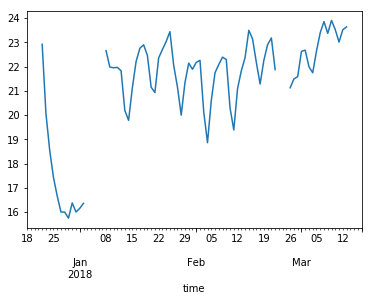

In [21]:
%matplotlib inline
# Visualization the average temperature based on time (day)
newdf.T_DHT11.resample('D').mean().plot()

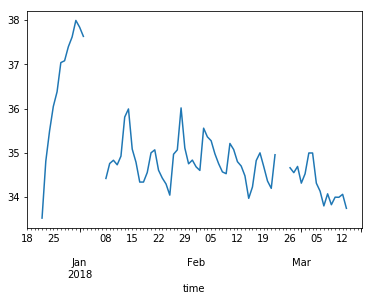

In [22]:
# Visualization the average humidity based on time (day)
newdf.H_DHT11.resample('D').mean().plot()

Note :
There are missing data in temperature and humidity graphs,
it happens because there is no data both in temperature and humidity dataframe 